In [5]:
import numpy as np
import pandas as pd
import os
from pandas import read_csv

data = read_csv('Housing.csv')

print(data.head (5))

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [6]:
print(np.shape(data))

(545, 13)


In [7]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


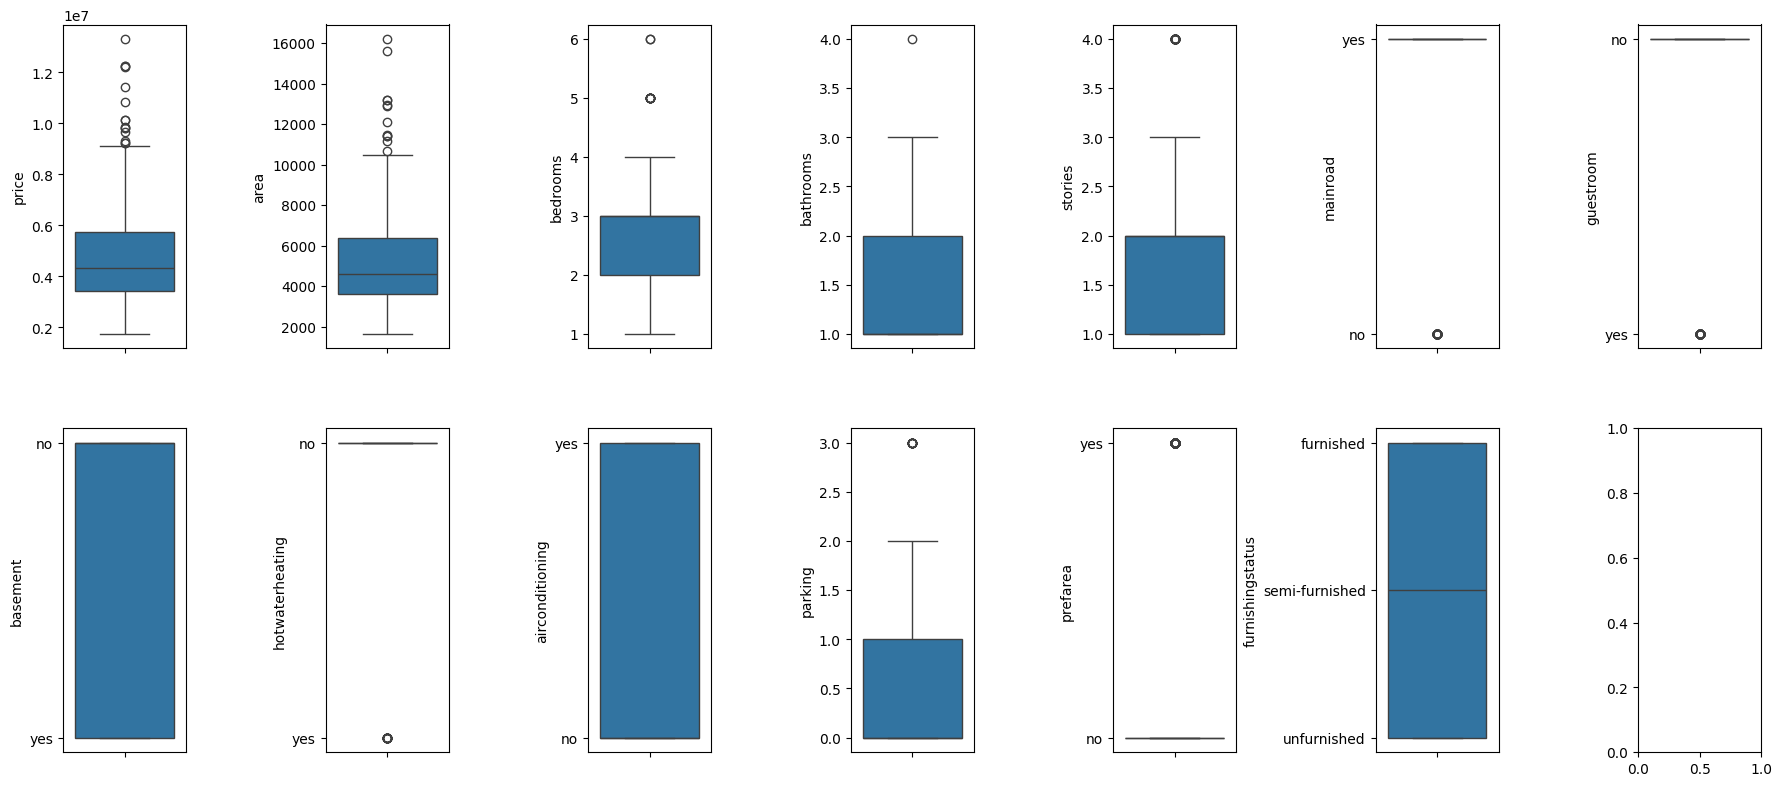

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
  sns.boxplot (y=k, data=data, ax=axs[index])
  index += 1
plt.tight_layout(pad=8.4, w_pad=0.5, h_pad=5.0)

In [11]:
for k, v in data.items():
    if v.dtype in ['int64', 'float64']:  # Check if the column is numeric
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    else:
        print(f"Column {k} is not numeric and will be skipped.")


Column price outliers = 2.75%
Column area outliers = 2.75%
Column bedrooms outliers = 2.20%
Column bathrooms outliers = 0.18%
Column stories outliers = 7.52%
Column mainroad is not numeric and will be skipped.
Column guestroom is not numeric and will be skipped.
Column basement is not numeric and will be skipped.
Column hotwaterheating is not numeric and will be skipped.
Column airconditioning is not numeric and will be skipped.
Column parking outliers = 2.20%
Column prefarea is not numeric and will be skipped.
Column furnishingstatus is not numeric and will be skipped.
